<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цель-и-задачи" data-toc-modified-id="Цель-и-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цель и задачи</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

## Цель и задачи

Целью работы является определить какой тарифный план приносит больше прибыли.

Задачи:
- сделать предварительный анализ тарифов на небольшой выборке клиентов;
- проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание данных

Таблица `users` (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица `calls` (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица `messages` (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица `internet` (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица `tariffs` (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Загрузка данных и подготовка их к анализу
Загрузим все таблицы. Выведем у каждой таблицы первые пять строк и посмотрим на информацию о таблице.

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import numpy as np
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
calls = pd.read_csv('/datasets/calls.csv') #читаем файл
print(calls.head(5)) #выводим первые 5 строк
calls.info()

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений не обнаружено. Тип даты необходимо перевсти в правильный формат. И проверим таблицу на наличие дубликатов. И аналогичные действия проведем со следующими таблицами 

In [3]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [4]:
print('Количество дубликатов:',calls.duplicated().sum())

Количество дубликатов: 0


In [5]:
internet = pd.read_csv('/datasets/internet.csv', index_col=0) #читаем файл
print(internet.head(5)) #выводим первые 5 строк
internet.info()

       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:

internet['session_date'] = pd.to_datetime(internet['session_date'])
print('Количество дубликатов:',internet.duplicated().sum())

Количество дубликатов: 0


In [7]:
messages = pd.read_csv('/datasets/messages.csv') #читаем файл
print(messages.head(5)) #выводим первые 5 строк
messages.info()

       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
messages['message_date'] = pd.to_datetime(messages['message_date'])
print('Количество дубликатов:',messages.duplicated().sum())

Количество дубликатов: 0


In [9]:
tariffs = pd.read_csv('/datasets/tariffs.csv') #читаем файл
print(tariffs.head(5)) #выводим первые 5 строк
tariffs.info()

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff

In [10]:
users = pd.read_csv('/datasets/users.csv') #читаем файл
print(users.head(5)) #выводим первые 5 строк
users.info()

   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   ta

В столбце с данными о прекращении пользования тарифом 462 пропущенных значения. Данные пропуски означают, что на момент выгрузки данных пользователь продолжал пользоваться тарифом. Значит, данные пропуски лучше оставить без изменений.

In [11]:
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
print('Количество дубликатов:',users.duplicated().sum())

Количество дубликатов: 0


### Вывод

В ходе выгрузки данных были исправлены типы данных. Дубликатов в таблицах не оказалось.

## Предобработка данных

Чтобы не нагружать таблицу `users` удалим столбцы с возрастом и именем.

In [12]:
users = users.drop(['age', 'first_name', 'last_name'], axis=1)
users

,user_id,churn_date,city,reg_date,tariff
0,1000,NaT,Краснодар,2018-05-25,ultra
1,1001,NaT,Москва,2018-11-01,smart
2,1002,NaT,Стерлитамак,2018-06-17,smart
3,1003,NaT,Москва,2018-08-17,ultra
4,1004,NaT,Новокузнецк,2018-05-14,ultra
...,...,...,...,...,...
495,1495,NaT,Иркутск,2018-08-28,ultra
496,1496,NaT,Вологда,2018-01-27,smart
497,1497,NaT,Челябинск,2018-10-09,smart
498,1498,2018-10-25,Владикавказ,2018-07-19,smart


Округлим данные столбца duration таблицы `calls` в большую сторону.

In [13]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


In [14]:
#Создадим столбец с месяцем в таблице звонков
calls['month'] = calls['call_date'].dt.month_name()

Сгруппируем таблицу по пользователю и месяцу и посчитаем длительность и количество звонков в месяц

In [15]:
call = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index().rename(columns={'duration':'month_duration','id':'calls_total'})
call

,user_id,month,month_duration,calls_total
0,1000,August,408,52
1,1000,December,333,46
2,1000,July,340,47
3,1000,June,172,43
4,1000,May,159,22
...,...,...,...,...
3169,1498,September,471,59
3170,1499,December,492,69
3171,1499,November,612,74
3172,1499,October,449,68


Аналогичные действия проведем с таблицами сообщений и интернета.

In [16]:
#количество отправленных сообщений по месяцам
messages['month'] = messages['message_date'].dt.month_name()

In [17]:
message = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index().rename(columns = {'id':'messages_total'})
message

,user_id,month,messages_total
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22
...,...,...,...
2712,1498,September,44
2713,1499,December,66
2714,1499,November,59
2715,1499,October,48


In [18]:
#Объем израсходованного трафика по месяцам
internet['month'] = internet['session_date'].dt.month_name()

In [19]:
net = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index().rename(columns = {'mb_used':'mb_in_month'})
net

,user_id,month,mb_in_month
0,1000,August,14055.93
1,1000,December,9817.61
2,1000,July,14003.64
3,1000,June,23233.77
4,1000,May,2253.49
...,...,...,...
3198,1498,September,22134.41
3199,1499,December,13055.58
3200,1499,November,17963.31
3201,1499,October,17788.51


In [20]:
#округлим значения 
net['mb_used'] = internet['mb_used'].apply(np.ceil).astype('int64')

Для объединения таблицы `tariffs` необходимо переименовать столбец с названием тарифа.

In [21]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

Теперь можем объединить все таблицы в одну.

In [22]:
df = call.merge(message, on=['user_id','month'], how='outer')
df = df.merge(net, on=['user_id','month'], how='outer')
df = df.merge(users, on='user_id', how='left')
df = df.merge(tariffs, on='tariff', how='left')
df.head()

,user_id,month,month_duration,calls_total,messages_total,mb_in_month,mb_used,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,408.0,52.0,81.0,14055.93,113.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,333.0,46.0,70.0,9817.61,1053.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,340.0,47.0,75.0,14003.64,1198.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,172.0,43.0,60.0,23233.77,551.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,159.0,22.0,22.0,2253.49,303.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


Проверим информацию о полученной таблице

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3214 non-null   int64         
 1   month                  3214 non-null   object        
 2   month_duration         3174 non-null   float64       
 3   calls_total            3174 non-null   float64       
 4   messages_total         2717 non-null   float64       
 5   mb_in_month            3203 non-null   float64       
 6   mb_used                3203 non-null   float64       
 7   churn_date             187 non-null    datetime64[ns]
 8   city                   3214 non-null   object        
 9   reg_date               3214 non-null   datetime64[ns]
 10  tariff                 3214 non-null   object        
 11  messages_included      3214 non-null   int64         
 12  mb_per_month_included  3214 non-null   int64         
 13  min

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,3214.0,1251.590230,144.659172,1000.0,1125.000,1253.00,1378.750,1499.00
month_duration,3174.0,456.931632,238.031270,0.0,290.000,447.00,592.000,1673.00
calls_total,3174.0,63.833333,32.678036,1.0,41.000,63.00,83.000,244.00
messages_total,2717.0,45.283769,35.051363,1.0,19.000,38.00,63.000,224.00
mb_in_month,3203.0,17266.708626,7516.356902,0.0,12526.905,16963.11,21432.175,49745.69
mb_used,3203.0,361.503903,278.225055,0.0,132.000,337.00,553.000,1365.00
messages_included,3214.0,341.148102,438.044726,50.0,50.000,50.00,1000.000,1000.00
mb_per_month_included,3214.0,20067.405103,7082.491569,15360.0,15360.000,15360.00,30720.000,30720.00
minutes_included,3214.0,1266.179216,1152.749279,500.0,500.000,500.00,3000.000,3000.00
rub_monthly_fee,3214.0,979.060361,645.539596,550.0,550.000,550.00,1950.000,1950.00


In [25]:
#количество уникальных пользователей в таблице
df['user_id'].nunique()

498

Изначально было 500 пользователей, 2 пользователя могли не войти в итоговую таблицу, так как скорее всего еще не успели начать пользоваться тарифом.

Заменим пропущенные значения во всех столбцах с пропусками, кроме churn_date,  на 0, так как возможно люди не пользуются тарифным планом. 

In [26]:
df['month_duration'] = df['month_duration'].fillna(0)
df['calls_total'] = df['calls_total'].fillna(0)
df['messages_total'] = df['messages_total'].fillna(0)
df['mb_in_month'] = df['mb_in_month'].fillna(0)

In [27]:
#Проверим
df.isna().sum()

user_id                     0
month                       0
month_duration              0
calls_total                 0
messages_total              0
mb_in_month                 0
mb_used                    11
churn_date               3027
city                        0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Проверим количество дубликатов.

In [28]:
df.duplicated().sum()

0

Переведем столбцы с мегабайтами в гигабайты. Напишем функцию для расчета выручки.

In [29]:
df['gb_in_month'] = np.ceil(df['mb_in_month']/1024).astype('Int8')
df['gb_per_month_included'] = np.ceil(df['mb_per_month_included']/1024).astype('Int8')

In [30]:
def revenue(row):
    revenue_sum = row['rub_monthly_fee']
    if row['month_duration'] > row['minutes_included']:
        revenue_sum += ((row['month_duration'] - row['minutes_included']) * row['rub_per_minute'])
    if row['messages_total'] > row['messages_included']:
        revenue_sum += ((row['messages_total'] - row['messages_included']) * row['rub_per_message'])
    if row['gb_in_month'] > row['gb_per_month_included']:
        revenue_sum += ((row['gb_in_month'] - row['gb_per_month_included'])*row['rub_per_gb'])
    return revenue_sum

In [31]:
df['revenue'] = df.apply(revenue, axis=1)
df

,user_id,month,month_duration,calls_total,messages_total,mb_in_month,mb_used,churn_date,city,reg_date,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_in_month,gb_per_month_included,revenue
0,1000,August,408.0,52.0,81.0,14055.93,113.0,NaT,Краснодар,2018-05-25,...,1000,30720,3000,1950,150,1,1,14,30,1950.0
1,1000,December,333.0,46.0,70.0,9817.61,1053.0,NaT,Краснодар,2018-05-25,...,1000,30720,3000,1950,150,1,1,10,30,1950.0
2,1000,July,340.0,47.0,75.0,14003.64,1198.0,NaT,Краснодар,2018-05-25,...,1000,30720,3000,1950,150,1,1,14,30,1950.0
3,1000,June,172.0,43.0,60.0,23233.77,551.0,NaT,Краснодар,2018-05-25,...,1000,30720,3000,1950,150,1,1,23,30,1950.0
4,1000,May,159.0,22.0,22.0,2253.49,303.0,NaT,Краснодар,2018-05-25,...,1000,30720,3000,1950,150,1,1,3,30,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,December,0.0,0.0,35.0,17322.51,0.0,NaT,Санкт-Петербург,2018-08-15,...,50,15360,500,550,200,3,3,17,15,950.0
3210,1489,November,0.0,0.0,20.0,17491.56,0.0,NaT,Санкт-Петербург,2018-08-15,...,50,15360,500,550,200,3,3,18,15,1150.0
3211,1489,October,0.0,0.0,21.0,19559.44,432.0,NaT,Санкт-Петербург,2018-08-15,...,50,15360,500,550,200,3,3,20,15,1550.0
3212,1489,September,0.0,0.0,32.0,17206.30,82.0,NaT,Санкт-Петербург,2018-08-15,...,50,15360,500,550,200,3,3,17,15,950.0


Избавим таблицу от лишних столбцов.

In [32]:
df = df.drop(['churn_date', 'reg_date', 'mb_in_month','mb_per_month_included'], axis=1)
df

,user_id,month,month_duration,calls_total,messages_total,mb_used,city,tariff,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_in_month,gb_per_month_included,revenue
0,1000,August,408.0,52.0,81.0,113.0,Краснодар,ultra,1000,3000,1950,150,1,1,14,30,1950.0
1,1000,December,333.0,46.0,70.0,1053.0,Краснодар,ultra,1000,3000,1950,150,1,1,10,30,1950.0
2,1000,July,340.0,47.0,75.0,1198.0,Краснодар,ultra,1000,3000,1950,150,1,1,14,30,1950.0
3,1000,June,172.0,43.0,60.0,551.0,Краснодар,ultra,1000,3000,1950,150,1,1,23,30,1950.0
4,1000,May,159.0,22.0,22.0,303.0,Краснодар,ultra,1000,3000,1950,150,1,1,3,30,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,December,0.0,0.0,35.0,0.0,Санкт-Петербург,smart,50,500,550,200,3,3,17,15,950.0
3210,1489,November,0.0,0.0,20.0,0.0,Санкт-Петербург,smart,50,500,550,200,3,3,18,15,1150.0
3211,1489,October,0.0,0.0,21.0,432.0,Санкт-Петербург,smart,50,500,550,200,3,3,20,15,1550.0
3212,1489,September,0.0,0.0,32.0,82.0,Санкт-Петербург,smart,50,500,550,200,3,3,17,15,950.0


### Вывод

В ходе предобработки данных были сгруппированы и объединены исходные таблицы сгруппированы, заполнены пропуски, мегабайты переведены в гигабайты, произведен расчет помесячной выручки с каждого пользователя, удалены лишние столбцы.

## Анализ данных

Опишем поведение клиентов оператора, исходя из выборки. Проанализируем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение. 

Для удобства разделим таблицу по тарифам.

In [33]:
smart = df.query('tariff == "smart"')
ultra = df.query('tariff == "ultra"')

In [34]:
smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.506505,146.119496,1001.0,1121.0,1239.0,1376.0,1499.0
month_duration,2229.0,417.934948,190.313730,0.0,282.0,422.0,545.0,1435.0
calls_total,2229.0,58.463437,25.939858,0.0,40.0,60.0,76.0,198.0
messages_total,2229.0,33.384029,28.227876,0.0,10.0,28.0,51.0,143.0
mb_used,2228.0,363.537702,276.845715,0.0,138.0,342.5,550.0,1365.0
messages_included,2229.0,50.000000,0.000000,50.0,50.0,50.0,50.0,50.0
minutes_included,2229.0,500.000000,0.000000,500.0,500.0,500.0,500.0,500.0
rub_monthly_fee,2229.0,550.000000,0.000000,550.0,550.0,550.0,550.0,550.0
rub_per_gb,2229.0,200.000000,0.000000,200.0,200.0,200.0,200.0,200.0
rub_per_message,2229.0,3.000000,0.000000,3.0,3.0,3.0,3.0,3.0


In [35]:
ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,985.0,1263.094416,140.694908,1000.0,1143.0,1277.0,1381.0,1495.0
month_duration,985.0,526.623350,317.606098,0.0,284.0,518.0,752.0,1673.0
calls_total,985.0,73.392893,43.916853,0.0,41.0,74.0,104.0,244.0
messages_total,985.0,49.363452,47.804457,0.0,6.0,38.0,79.0,224.0
mb_used,975.0,356.856410,281.439425,0.0,108.5,330.0,559.5,1313.0
messages_included,985.0,1000.000000,0.000000,1000.0,1000.0,1000.0,1000.0,1000.0
minutes_included,985.0,3000.000000,0.000000,3000.0,3000.0,3000.0,3000.0,3000.0
rub_monthly_fee,985.0,1950.000000,0.000000,1950.0,1950.0,1950.0,1950.0,1950.0
rub_per_gb,985.0,150.000000,0.000000,150.0,150.0,150.0,150.0,150.0
rub_per_message,985.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Средняя длительность звонка для тарифа `smart` 418 минут, для `ultra` — 527. Среднее количество сообений для тарифа `smart` — 33, для `ultra` — 50. Среднее количество использованных гигабайт для тарифа `smart` 16 гб, для `ultra` — 20 гб.

Посчитаем дисперсию и среднее отклонение для длительности звонков.

In [36]:
print('Дисперсия для тарифа smart:', np.var(smart['month_duration'], ddof=1))
print('Среднее отклонение для тарифа smart:', np.std(smart['month_duration'], ddof=1))
print('Дисперсия для тарифа ultra:', np.var(ultra['month_duration'], ddof=1))
print('Среднее отклонение для тарифа ultra:', np.std(ultra['month_duration'], ddof=1))

Дисперсия для тарифа smart: 36219.31578434428
Среднее отклонение для тарифа smart: 190.31372988921288
Дисперсия для тарифа ultra: 100873.63339730098
Среднее отклонение для тарифа ultra: 317.6060978591264


Посчитаем дисперсию и среднее отклонение для количества сообщений.

In [37]:
print('Дисперсия для тарифа smart:', np.var(smart['messages_total'], ddof=1))
print('Среднее отклонение для тарифа smart:', np.std(smart['messages_total'], ddof=1))
print('Дисперсия для тарифа ultra:', np.var(ultra['messages_total'], ddof=1))
print('Среднее отклонение для тарифа ultra:', np.std(ultra['messages_total'], ddof=1))

Дисперсия для тарифа smart: 796.8129584480083
Среднее отклонение для тарифа smart: 28.22787555676141
Дисперсия для тарифа ultra: 2285.2661425446736
Среднее отклонение для тарифа ultra: 47.804457350174715


Посчитаем дисперсию и среднее отклонение для количества гигабайт.

In [38]:
print('Дисперсия для тарифа smart:', np.var(smart['gb_in_month'], ddof=1))
print('Среднее отклонение для тарифа smart:', np.std(smart['gb_in_month'], ddof=1))
print('Дисперсия для тарифа ultra:', np.var(ultra['gb_in_month'], ddof=1))
print('Среднее отклонение для тарифа ultra:', np.std(ultra['gb_in_month'], ddof=1))

Дисперсия для тарифа smart: 33.02870517811161
Среднее отклонение для тарифа smart: 5.7470605685090534
Дисперсия для тарифа ultra: 97.09168626965459
Среднее отклонение для тарифа ultra: 9.853511367510293


Дисперсия показывает нам насколько далеко могут быть "разбросаны данные" от среднего значения. В данном случае видно, что для у тарифа `ultra` данные широко разбросаны от среднего как для длительности звоноков, так и для количества гб и сообщений.

Построим гистограммы для распределений длительности звонков, количества звонком, сообщений и гигабайт соответственно.

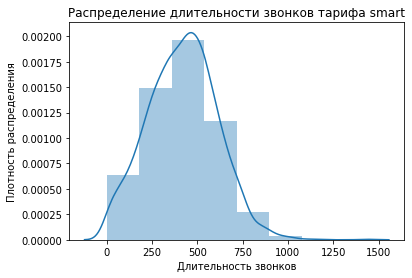

In [39]:
sns.distplot(smart['month_duration'], bins=8) 
plt.title("Распределение длительности звонков тарифа smart")
plt.xlabel('Длительность звонков')
plt.ylabel('Плотность распределения')
plt.show()

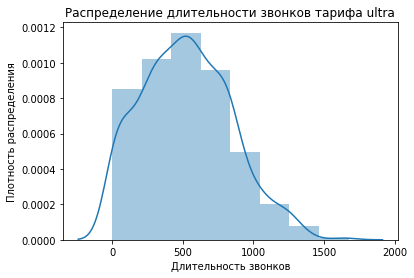

In [40]:
sns.distplot(ultra['month_duration'], bins=8) 
plt.title("Распределение длительности звонков тарифа ultra")
plt.xlabel('Длительность звонков')
plt.ylabel('Плотность распределения')
plt.show()

Как видно из графиков, для обоих тарифов характерна длительность 500 минут в месяц. Но в тарифе `smart` сдвиг в меньшую сторону, а для `ultra` - в большую.

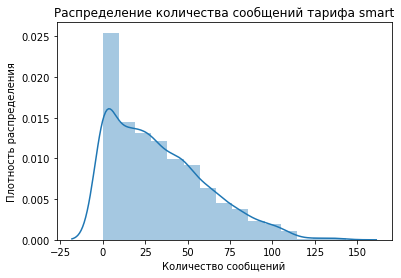

In [41]:
sns.distplot(smart['messages_total'], bins=15) 
plt.title("Распределение количества сообщений тарифа smart")
plt.xlabel('Количество сообщений')
plt.ylabel('Плотность распределения')
plt.show()

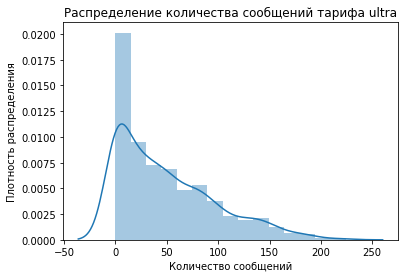

In [42]:
sns.distplot(ultra['messages_total'], bins=15) 
plt.title("Распределение количества сообщений тарифа ultra")
plt.xlabel('Количество сообщений')
plt.ylabel('Плотность распределения')
plt.show()

Как видно из графиков, для пользователей тарифа `smart` характерно в месяц писать до 10 сообщений, а для `ultra` примерно до 20 сообщений. Благодаря данным гистограммам видно насколько лучше для анализа строить графики, чем просто знать среднее. Так как, если вспомнить, то среднее для тарифов было 33 и 50. 

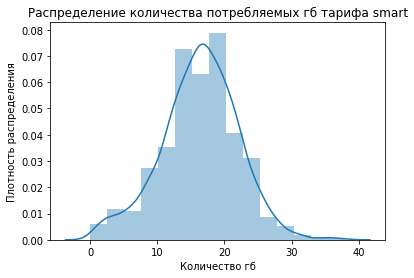

In [43]:
sns.distplot(smart['gb_in_month'], bins=15) 
plt.title("Распределение количества потребляемых гб тарифа smart")
plt.xlabel('Количество гб')
plt.ylabel('Плотность распределения')
plt.show()

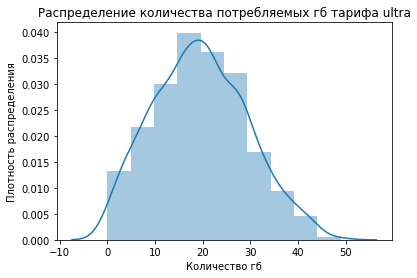

In [44]:
sns.distplot(ultra['gb_in_month'], bins=10) 
plt.title("Распределение количества потребляемых гб тарифа ultra")
plt.xlabel('Количество гб')
plt.ylabel('Плотность распределения')
plt.show()

По графикам видно, что в обоих тарифах пользователи используют от 15 до 20 гб.

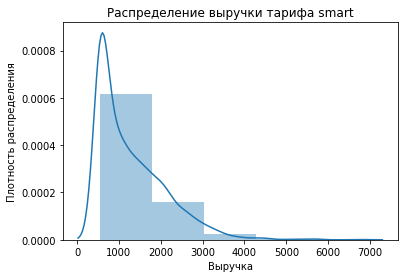

In [45]:
sns.distplot(smart['revenue'], bins=5) 
plt.title("Распределение выручки тарифа smart")
plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.show()

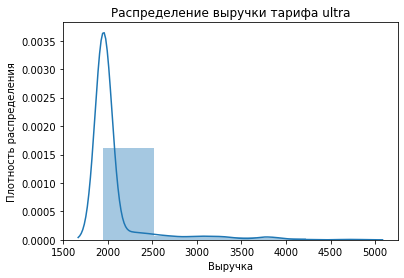

In [46]:
sns.distplot(ultra['revenue'], bins=5) 
plt.title("Распределение выручки тарифа ultra")
plt.xlabel('Выручка')
plt.ylabel('Плотность распределения')
plt.show()

По графикам видно, что чаще всего выручка в тарифе `smart` около 1000, в тарифе `ultra` составляет от 2000 до 2500 и может показаться, что в тарифе `ultra` выручка получается больше, чем в тарифе `smart`. Но не все так однозначно, так как в тарифе `smart` присутствует досточное количество пользователей, платящих до 3000. 

### Вывод

В данном пункте были проанализированы статистические данные, такие как среднее, дисперсия, среднее отклонение и построены гистограммы, которые лучше дали понять информацию о данных. 

Средняя длительность звонка для тарифа `smart` 418 минут, для `ultra` — 527. Среднее количество сообений для тарифа `smart` — 33, для `ultra` — 50. Среднее количество использованных гигабайт для тарифа `smart` 16 гб, для `ultra` — 20 гб.


Для обоих тарифов характерна длительность 500 минут в месяц. Но в тарифе `smart` сдвиг в меньшую сторону, а для `ultra` - в большую. Для пользователей тарифа `smart` характерно в месяц писать до 10 сообщений, а для `ultra` примерно до 20 сообщений. В обоих тарифах пользователи используют от 15 до 20 гб. Чаще всего выручка в тарифе `smart` около 1000, в тарифе `ultra` составляет от 2000 до 2500 и может показаться, что в тарифе `ultra` выручка получается больше, чем в тарифе `smart`. Но не все так однозначно, так как в тарифе `smart` присутствует досточное количество пользователей, платящих до 3000. 

## Проверка гипотез

* средняя выручка пользователей тарифов `smart` и `ultra` различается;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
Будем использовать t-критерий Стьюдента, так как сравниваемые выборки независимы между собой. Гипотеза о равенстве средних двух генеральных совокупностей №1

Сформулируем гипотезы:

- Н0: Выручка тарифов `smart` и `ultra` не различается;
- Н1: Выручка тарифов `smart` и `ultra` различается.

Выведем среднее, дисперсию, среднее квадратическое отклонение по выручке на каждый тариф.

In [47]:
print('Среднее для тарифа smart:', smart['revenue'].mean())
print('Дисперсия для тарифа smart:', np.var(smart['revenue'], ddof=1))
print('Среднее отклонение для тарифа smart:', np.std(smart['revenue'], ddof=1))
print('Среднее для тарифа ultra:', ultra['revenue'].mean())
print('Дисперсия для тарифа ultra:', np.var(ultra['revenue'], ddof=1))
print('Среднее отклонение для тарифа ultra:', np.std(ultra['revenue'], ddof=1))

Среднее для тарифа smart: 1289.9735307312696
Дисперсия для тарифа smart: 669785.7080064242
Среднее отклонение для тарифа smart: 818.4043670499469
Среднее для тарифа ultra: 2070.1522842639592
Дисперсия для тарифа ultra: 141516.7450786183
Среднее отклонение для тарифа ultra: 376.1871144505328


Так как дисперсии сильно отличаются, то в качестве equal_var примем False.

In [48]:
sample_1 = smart['revenue']
sample_2 = ultra['revenue']

# принимаем критический уровень статистической значимости
# если p-value окажется меньше данного значения - отвергаем нулевую гипотезу
alpha = .05

# зададим параметр equal_var = False, так как дисперсии выборок не равны между собой
results = st.stats.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, т.е. маловероятна случайность результатов теста гипотезы.

Сформулируем гипотезы для второй гипотезы:
- H0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов;
- H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Посчитаем Среднее, дисперсию, среднее квадратическое отклонение. 

In [49]:
print('Среднее для Москвы:', df.query('city == "Москва"')['revenue'].mean())
print('Дисперсия для Москвы:', np.var(df.query('city == "Москва"')['revenue'], ddof=1))
print('Среднее отклонение для Москвы:', np.std(df.query('city == "Москва"')['revenue'], ddof=1))
print('Среднее для провинции:', df.query('city != "Москва"')['revenue'].mean())
print('Дисперсия для провинции:', np.var(df.query('city != "Москва"')['revenue'], ddof=1))
print('Среднее отклонение для провинции:', np.std(df.query('city != "Москва"')['revenue'], ddof=1))

Среднее для Москвы: 1546.7135842880523
Дисперсия для Москвы: 565636.467011886
Среднее отклонение для Москвы: 752.0880713133841
Среднее для провинции: 1524.9362274298885
Дисперсия для провинции: 654137.6285218114
Среднее отклонение для провинции: 808.7877524553716


In [50]:
sample_1 = df.query('city == "Москва"')['revenue']
sample_2 = df.query('city != "Москва"')['revenue']

# принимаем критический уровень статистической значимости
# если p-value окажется меньше данного значения - отвергаем нулевую гипотезу
alpha = .05

# зададим параметр equal_var = False, так как дисперсии выборок не равны между собой
results = st.stats.ttest_ind(sample_1, sample_2, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Получаем, что средняя выручка мало зависит от региона. По среднему значению так же видно, что числа различаются незначительно. 

### Вывод

В данном пункте были проверены гипотезы, по которым можно сделать вывод, что выручка тарифов `smart` и `ultra` различается, но средняя выручка в Москве и других городах не особо различается.

## Общий вывод

В ходе работы были загружены таблицы с данными, проведена обработка данных, соединены все таблицы и проведен анализ полученной таблицы.

Средняя длительность звонка для тарифа `smart` 418 минут, для `ultra` — 527. Среднее количество сообений для тарифа `smart` — 33, для `ultra` — 50. Среднее количество использованных гигабайт для тарифа `smart` 16 гб, для `ultra` — 20 гб.


Для обоих тарифов характерна длительность 500 минут в месяц. Но в тарифе `smart` сдвиг в меньшую сторону, а для `ultra` - в большую. Для пользователей тарифа `smart` характерно в месяц писать до 10 сообщений, а для `ultra` примерно до 20 сообщений. В обоих тарифах пользователи используют от 15 до 20 гб. Чаще всего выручка в тарифе `smart` около 1000, в тарифе `ultra` составляет от 2000 до 2500 и может показаться, что в тарифе `ultra` выручка получается больше, чем в тарифе `smart`. Но не все так однозначно, так как в тарифе `smart` присутствует досточное количество пользователей, платящих до 3000. 

Проверка гипотез показала, что выручка тарифов `smart` и `ultra` различается, но средняя выручка в Москве и других городах не особо различается.

Опираясь на данные, коммерческий департамент компании "Мегалайн" может скорректировать рекламный бюджет в сторону более прибыльного тарифа — `ultra`.